Load the transaction_data.csv dataset. Check the table size, variable types, number of missing values and descriptive statistics.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [70]:
transaction = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module5/Project/transaction_data.csv',
                         parse_dates=['date'])
transaction.describe()

C:\Users\stask\AppData\Local\Temp\ipykernel_8100\3470760464.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [19]:
transaction.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

What values are in the transaction column? How many observations belong to one level or another? Visualise the result with a barplot. Think about how the graph can be improved.

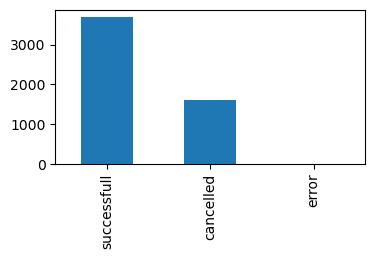

In [42]:
plt.figure(figsize=(4, 2))
transaction.transaction.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='transaction', ylabel='count'>

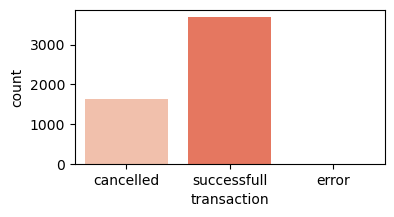

In [43]:
plt.figure(figsize=(4, 2))
sns.countplot(x='transaction', data=transaction, palette='Reds')

How many transactions ended in error?

In [44]:
transaction.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

How many successful transactions did each user perform? Construct a histogram of the distribution of the number of successful transactions.

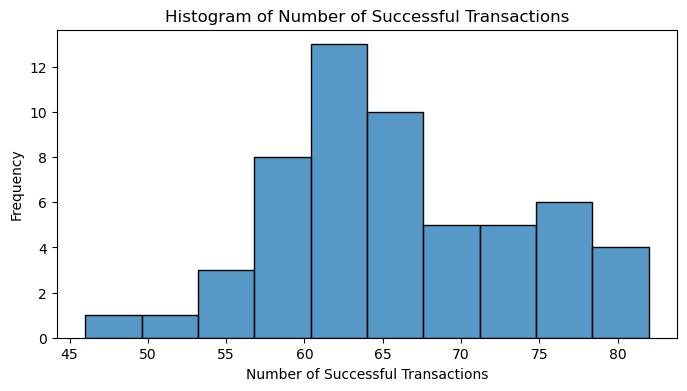

In [55]:
successful_transactions = transaction[transaction.transaction == 'successfull'] \
    .groupby('name',as_index=False) \
    .agg({'date':'count'}).rename(columns={'date':'transaction_num'}) \
    .sort_values('transaction_num', ascending=False)

plt.figure(figsize=(8, 4))
sns.histplot(data=successful_transactions, x='transaction_num', kde=False, bins=10)
plt.xlabel('Number of Successful Transactions')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Successful Transactions')
plt.show()

A colleague has sent you updated data. (transaction_data_updated.csv)
Build a user_vs_minute_pivot crosstab, where the columns are user names, rows are minutes and values are the number of transactions performed in a given minute. Fill in the missing values with zeros.

In [64]:
updated_transaction = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module5/Project/transaction_data_updated.csv',
                         parse_dates=['date'])
user_vs_minute_pivot = updated_transaction.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction':'count'}) \
    .pivot_table(index='minute', columns='name', values='transaction', fill_value=0)

Examine the graph presented. Help your colleague to find out if there is an error in the data, or if all is well.
If there is an error in the data, correct it and store the correct number of minutes since the beginning of the day in the true_minute column.

<AxesSubplot:xlabel='minute'>

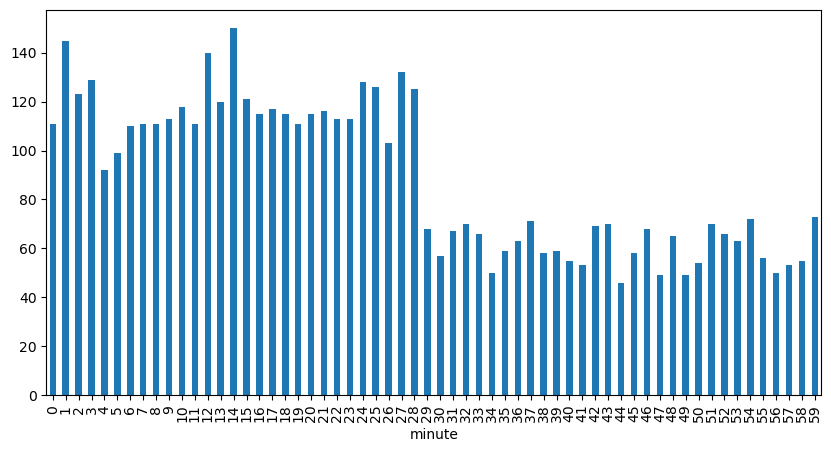

In [74]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(10,5))

In [77]:
updated_transaction['true_min'] = updated_transaction.date.dt.minute + updated_transaction.date.dt.hour*60
updated_transaction.head()

,date,name,transaction,minute,true_min
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


<AxesSubplot:ylabel='Frequency'>

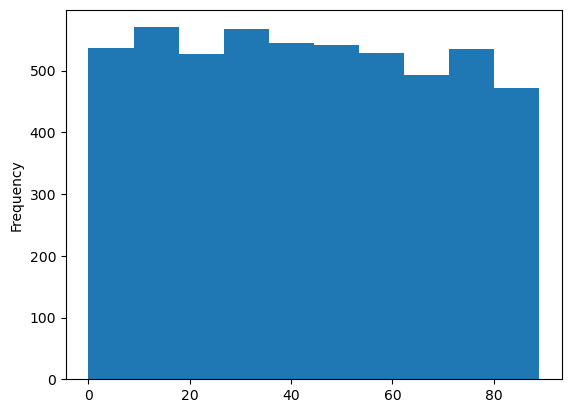

In [78]:
updated_transaction.true_min.plot.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_min', ylabel='count'>

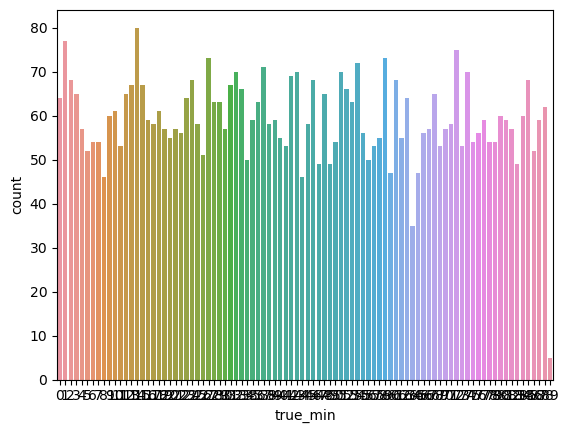

In [79]:
sns.countplot(updated_transaction['true_min'])